In [43]:
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
import schools

In [44]:
##
# load the school "ELA  test" data from the open api server
# load the school "MATH test" data from the open api server
# load the school "   demo  " data from the open api server

ELA_df  = schools.load_ELAtest()
MATH_df = schools.load_MATHtest()
demo_df = schools.load_demographics()

# To facilitate the reading of the data frames we renamed the columns 'year' and 'ay'
# year in ELA and MATH data are integers like in the previous column 'ay' in demo data
#
# Then we interchange the columns previous column 'year' by the previous column 'ay'
# in demo dataframe
demo_df.rename(columns = {'year':'YEAR', 'ay':'year'}, inplace = True)
#
col_list_demo = list(demo_df)
col_list_demo[2], col_list_demo[39] = col_list_demo[39], col_list_demo[2]
demo_df = demo_df.loc[:,col_list_demo]

# In case we still prefer to use the "old fashion" data frame:
df_0 = schools.load_demographics()

In [112]:
# Here we make the new columns from the data (First for MATH then for ELA and demo)
# To do so, we list the different variables, namely grades = [3,4,5,...],
# year = [2013,...,2018] and category = ['All Students', ...., etc]
# 
gr  = ['3','4','5','6','7','8','All Grades']
cat = ['All Students','Asian','Black','White','Hispanic','multiple_race_categories',
      'Male','Female','Econ Disadv','Non Econ Disadv','SWD','Not SWD','Ever ELL','Never ELL','Current ELL']
cat_label = ['All_Students','Asian','Black','White','Hispanic','multiple_race_categories',
      'Male','Female','Econ Disadv','Non_Econ_Disadv','SWD','Not_SWD','Ever_ELL','Never_ELL','Current_ELL']
yr = [2013,1014,2015,2016,2017,2018]
lv = ['number_tested','mean_scale_score','level_1','level_1_1','level_2','level_2_1','level_3','level_3_1',
     'level_4','level_4_1','level_3_4','%level_3_4_1']
#
# We make a list with the several dataframes that we can extract combining each category.
#
df_list_MATH = []
for g in gr:
    for y in yr:
        for k in range(0,len(cat_label)):
            df = MATH_df[(MATH_df.grade == g) & (MATH_df.year == y) & (MATH_df.category ==cat[k])]
            df.rename(columns= {'number_tested' : 'grade_'+str(g)+'_number_tested_'+str(y)+'_'+str(cat_label[k])+'MATH',
                                'mean_scale_score' : 'grade_'+str(g)+'_mean_score_'+str(y)+'_'+str(cat_label[k])+'MATH',
                                'level_1': 'grade_'+str(g)+'_level_1_'+str(y)+'_'+str(cat_label[k])+'MATH',
                                'level_1_1': 'grade_'+str(g)+'_%level_1'+str(y)+'_'+str(cat_label[k])+'MATH',
                                'level_2': 'grade_'+str(g)+'_level_2_'+str(y)+'_'+str(cat_label[k])+'MATH',
                                'level_2_1': 'grade_'+str(g)+'_%level_2_'+str(y)+'_'+str(cat_label[k])+'MATH',
                                'level_3': 'grade_'+str(g)+'_level_3_'+str(y)+'_'+str(cat_label[k])+'MATH',
                                'level_3_1': 'grade_'+str(g)+'_%level_3_'+str(y)+'_'+str(cat_label[k])+'MATH',
                                'level_4': 'grade_'+str(g)+'_level_4_'+str(y)+'_'+str(cat_label[k])+'MATH',
                                'level_4_1': 'grade_'+str(g)+'_%level_4_'+str(y)+'_'+str(cat_label[k])+'MATH',
                                'level_3_4': 'grade_'+str(g)+'_level_3+4_'+str(y)+'_'+str(cat_label[k])+'MATH',
                                'level_3_4_1': 'grade_'+str(g)+'_%level_3+4_'+str(y)+'_'+str(cat_label[k])+'MATH',
                               }, inplace = True)
            del df['grade']
            del df['category'] #df.drop(columns=["grade","category"])
            df_list_MATH.append(df)

            
df_list_ELA = []
for g in gr:
    for y in yr:
        for k in range(0,len(cat_label)):
            df = ELA_df[(ELA_df.grade == g) & (ELA_df.year == y) & (ELA_df.category ==cat[k])]
            df.rename(columns= {'number_tested' : 'grade_'+str(g)+'_number_tested_'+str(y)+'_'+str(cat_label[k])+'ELA',
                                'mean_scale_score' : 'grade_'+str(g)+'_mean_score_'+str(y)+'_'+str(cat_label[k])+'ELA',
                                'level_1': 'grade_'+str(g)+'_level_1_'+str(y)+'_'+str(cat_label[k])+'ELA',
                                'level_1_1': 'grade_'+str(g)+'_%level_1'+str(y)+'_'+str(cat_label[k])+'ELA',
                                'level_2': 'grade_'+str(g)+'_level_2_'+str(y)+'_'+str(cat_label[k])+'ELA',
                                'level_2_1': 'grade_'+str(g)+'_%level_2_'+str(y)+'_'+str(cat_label[k])+'ELA',
                                'level_3': 'grade_'+str(g)+'_level_3_'+str(y)+'_'+str(cat_label[k])+'ELA',
                                'level_3_1': 'grade_'+str(g)+'_%level_3_'+str(y)+'_'+str(cat_label[k])+'ELA',
                                'level_4': 'grade_'+str(g)+'_level_4_'+str(y)+'_'+str(cat_label[k])+'ELA',
                                'level_4_1': 'grade_'+str(g)+'_%level_4_'+str(y)+'_'+str(cat_label[k])+'ELA',
                                'level_3_4': 'grade_'+str(g)+'_level_3+4_'+str(y)+'_'+str(cat_label[k])+'ELA',
                                'level_3_4_1': 'grade_'+str(g)+'_%level_3+4_'+str(y)+'_'+str(cat_label[k])+'ELA',
                               }, inplace = True)
            del df['grade']
            del df['category'] #df.drop(columns=["grade","category"])
            df_list_ELA.append(df)
            

/home/ezequiel/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [113]:
# Here we can check some elements of the list with dataframes...
#df_list[1]

# Next we merge all the data set into a big one (for MATH and ELA separately)...
big_MATH_df = df_list_MATH[0]
for j in range(1,40):#len(df_list_MATH)+1):
    big_MATH_df = pd.merge(big_MATH_df,df_list_MATH[j], left_index=False, right_index=False, 
                       how = 'outer', on=['dbn','school_name','year','ay','district','boro','boro_name'])
    
big_ELA_df = df_list_ELA[0]
for j in range(1,40):#len(df_list_ELA)+1):
    big_ELA_df = pd.merge(big_ELA_df,df_list_ELA[j], left_index=False, right_index=False, 
                       how = 'outer', on=['dbn','school_name','year','ay','district','boro','boro_name'])
    
# Now we merge ELA and MATH big data frames into a bigger one...
big_ELAMATH_df = big_MATH_df.merge(big_ELA_df, left_index=False, right_index=False, how='outer',
                          on=['dbn','school_name','year','ay','district','boro','boro_name'])

# Now we merge the the big ELA+MATH to the original demo dataframe...
del big_ELAMATH_df['ay']     # Here we delete a column which is repeated in order to avoid
                             # problems in the merging below...
big_df = big_ELAMATH_df.merge(demo_df, left_index=False, right_index=False, how='outer',
                          on=['dbn','school_name','year','district','boro','boro_name'])


In [116]:
# We display the final dataframes...
#
#big_MATH_df
#big_ELA_df
#big_ELAMATH_df
big_df

,dbn,school_name,year,grade_3_number_tested_2013_All_StudentsMATH,grade_3_mean_score_2013_All_StudentsMATH,grade_3_level_1_2013_All_StudentsMATH,grade_3_%level_12013_All_StudentsMATH,grade_3_level_2_2013_All_StudentsMATH,grade_3_%level_2_2013_All_StudentsMATH,grade_3_level_3_2013_All_StudentsMATH,...,students_with_disabilities_1,english_language_learners,english_language_learners_1,poverty,poverty_1,economic_need_index,non_white,black_hispanic,white_asian,non_white_asian
0,01M015,P.S. 015 Roberto Clemente,2013,27.0,278,16,59.3,11,40.7,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01M019,P.S. 019 Asher Levy,2013,36.0,311,8,22.2,10,27.8,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01M020,P.S. 020 Anna Silver,2013,79.0,302,20,25.3,31,39.2,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01M034,P.S. 034 Franklin D. Roosevelt,2013,39.0,292,14,35.9,13,33.3,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01M063,The STAR Academy - P.S.63,2013,19.0,283,8,42.1,7,36.8,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,01M064,P.S. 064 Robert Simon,2013,32.0,275,20,62.5,10,31.3,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,01M110,P.S. 110 Florence Nightingale,2013,54.0,322,10,18.5,9,16.7,19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,01M134,P.S. 134 Henrietta Szold,2013,51.0,304,11,21.6,24,47.1,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,01M140,P.S. 140 Nathan Straus,2013,31.0,273,18,58.1,12,38.7,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,01M142,P.S. 142 Amalia Castro,2013,58.0,303,14,24.1,23,39.7,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
# Here we take the means at the level of district, divided by year...
means_big_df = big_df.groupby(["district","year"]).agg('mean')
means_big_df

grade_3_number_tested_2013_All_StudentsMATH  \
district year                                                
1        2013                                    49.000000   
         2014                                          NaN   
         2015                                          NaN   
         2016                                          NaN   
         2017                                          NaN   
         2018                                          NaN   
2        2013                                    85.258065   
         2014                                          NaN   
         2015                                          NaN   
         2016                                          NaN   
         2017                                          NaN   
         2018                                          NaN   
3        2013                                    77.157895   
         2014                                          NaN   
         2015                                          NaN   
         2016                                          NaN   
         2017                                          NaN   
         2018                                          NaN   
4        2013                                    53.000000   
         2014                                          NaN   
         2015                                          NaN   
         2016                                          NaN   
         2017                                          NaN   
         2018                                          NaN   
5        2013                                    58.533333   
         2014                                          NaN   
         2015                                          NaN   
         2016                                          NaN   
         2017                                          NaN   
         2018                                          NaN   
...                                                    ...   
30       2016                                          NaN   
         2017                                          NaN   
         2018                                          NaN   
31       2013                                   100.772727   
         2014                                          NaN   
         2015                                          NaN   
         2016                                          NaN   
         2017                                          NaN   
         2018                                          NaN   
32       2013                                    93.000000   
         2014                                          NaN   
         2015                                          NaN   
         2016                                          NaN   
         2017                                          NaN   
         2018                                          NaN   
75       2014                                          NaN   
         2015                                          NaN   
         2016                                          NaN   
         2017                                          NaN   
         2018                                          NaN   
79       2014                                          NaN   
         2015                                          NaN   
         2016                                          NaN   
         2017                                          NaN   
         2018                                          NaN   
84       2014                                          NaN   
         2015                                          NaN   
         2016                                          NaN   
         2017                                          NaN   
         2018                                          NaN   

               grade_3_number_tested_2013_AsianMATH  \
district year                                        

In [118]:
# Here we take the means at the level of borough, divided by year...
boro_big_df = big_df.groupby(["boro","year"]).agg('mean')
boro_big_df

grade_3_number_tested_2013_All_StudentsMATH   district  \
boro year                                                           
K    2013                                    90.899563  18.917031   
     2014                                          NaN  29.488971   
     2015                                          NaN  29.449275   
     2016                                          NaN  29.922801   
     2017                                          NaN  30.087344   
     2018                                          NaN  30.247803   
M    2013                                    72.097561   3.406504   
     2014                                          NaN  16.179191   
     2015                                          NaN  16.207977   
     2016                                          NaN  16.857955   
     2017                                          NaN  17.344538   
     2018                                          NaN  17.701950   
Q    2013                                   114.209945  27.000000   
     2014                                          NaN  31.302198   
     2015                                          NaN  31.315650   
     2016                                          NaN  31.767196   
     2017                                          NaN  32.026247   
     2018                                          NaN  32.259067   
R    2013                                   100.772727  31.000000   
     2014                                          NaN  34.710526   
     2015                                          NaN  35.240506   
     2016                                          NaN  35.187500   
     2017                                          NaN  35.187500   
     2018                                          NaN  35.790123   
X    2013                                   100.816327   9.687075   
     2014                                          NaN  21.026634   
     2015                                          NaN  21.852804   
     2016                                          NaN  22.193925   
     2017                                          NaN  22.977064   
     2018                                          NaN  23.827354   

           grade_3_number_tested_2013_AsianMATH  \
boro year                                         
K    2013                             20.335260   
     2014                                   NaN   
     2015                                   NaN   
     2016                                   NaN   
     2017                                   NaN   
     2018                                   NaN   
M    2013                             13.064516   
     2014                                   NaN   
     2015                                   NaN   
     2016                                   NaN   
     2017                                   NaN   
     2018                                   NaN   
Q    2013                             38.518072   
     2014                                   NaN   
     2015                                   NaN   
     2016                                   NaN   
     2017                                   NaN   
     2018                                   NaN   
R    2013                              7.785714   
     2014                                   NaN   
     2015                                   NaN   
     2016                                   NaN   
     2017                                   NaN   
     2018                                   NaN   
X    2013                              6.709677   
     2014                                   NaN   
     2015                                   NaN   
     2016                                   NaN   
     2017                                   NaN   
     2018                                   NaN   

           grade_3_number_tested_2013_BlackMATH  \
boro year                                         
K    2013                             33.655814   
     2014       

Below follows old things....

In [5]:
##
# load the school demo data from the open api server
df_0 = schools.load_demographics()
df_0

,dbn,school_name,year,total_enrollment,grade_pk_half_day_full_day,grade_k,grade_1,grade_2,grade_3,grade_4,...,poverty_1,economic_need_index,ay,district,boro,boro_name,non_white,black_hispanic,white_asian,non_white_asian
0,01M015,P.S. 015 Roberto Clemente,2014-15,183,18,27,47,31,19,17,...,0.923,0.930,2014,1,M,Manhattan,181,172,10,173
1,01M015,P.S. 015 Roberto Clemente,2015-16,176,14,32,33,39,23,17,...,0.847,0.889,2015,1,M,Manhattan,174,162,11,165
2,01M015,P.S. 015 Roberto Clemente,2016-17,178,17,28,33,27,31,24,...,0.854,0.882,2016,1,M,Manhattan,174,156,18,160
3,01M015,P.S. 015 Roberto Clemente,2017-18,190,17,28,32,33,23,31,...,0.847,0.890,2017,1,M,Manhattan,184,162,26,164
4,01M015,P.S. 015 Roberto Clemente,2018-19,174,13,20,33,30,30,20,...,0.833,0.880,2018,1,M,Manhattan,168,143,30,144
5,01M019,P.S. 019 Asher Levy,2014-15,270,30,44,40,39,35,40,...,0.741,0.605,2014,1,M,Manhattan,243,205,57,213
6,01M019,P.S. 019 Asher Levy,2015-16,270,21,47,43,41,43,35,...,0.804,0.625,2015,1,M,Manhattan,254,224,43,227
7,01M019,P.S. 019 Asher Levy,2016-17,271,24,37,46,47,40,43,...,0.764,0.578,2016,1,M,Manhattan,256,231,39,232
8,01M019,P.S. 019 Asher Levy,2017-18,257,13,34,38,42,46,42,...,0.770,0.679,2017,1,M,Manhattan,241,215,39,218
9,01M019,P.S. 019 Asher Levy,2018-19,249,10,30,39,43,41,44,...,0.723,0.668,2018,1,M,Manhattan,231,208,32,217


In [5]:
##
# load the ELA tests data from the .csv file
df_ELA_distr = pd.read_csv(ela_distr) 
df_ELA_distr

,District,Grade,Year,Category,Number Tested,Mean Scale Score,# Level 1,% Level 1,# Level 2,% Level 2,# Level 3,% Level 3,# Level 4,% Level 4,# Level 3+4,% Level 3+4
0,1,3,2013,Asian,191,320,27,"14,1",63,"33,0",77,"40,3",24,"12,6",101,"52,9"
1,1,3,2014,Asian,180,316,44,"24,4",47,"26,1",65,"36,1",24,"13,3",89,"49,4"
2,1,3,2015,Asian,184,317,37,"20,1",54,"29,3",64,"34,8",29,"15,8",93,"50,5"
3,1,3,2016,Asian,174,330,17,"9,8",41,"23,6",80,"46,0",36,"20,7",116,"66,7"
4,1,3,2017,Asian,145,328,23,"15,9",28,"19,3",55,"37,9",39,"26,9",94,"64,8"
5,1,3,2018,Asian,161,614,15,"9,3",30,"18,6",69,"42,9",47,"29,2",116,"72,0"
6,1,3,2019,Asian,146,614,11,"7,5",24,"16,4",61,"41,8",50,"34,2",111,"76,0"
7,1,4,2013,Asian,164,319,24,"14,6",50,"30,5",56,"34,1",34,"20,7",90,"54,9"
8,1,4,2014,Asian,187,327,18,"9,6",49,"26,2",59,"31,6",61,"32,6",120,"64,2"
9,1,4,2015,Asian,168,320,22,"13,1",50,"29,8",48,"28,6",48,"28,6",96,"57,1"


In [6]:
##
# load the ELA tests data from the .csv file
df_ELA_boro = pd.read_csv(ela_boro) 
df_ELA_boro

,Borough,Grade,Year,Category,Number Tested,Mean Scale Score,# Level 1,% Level 1,# Level 2,% Level 2,# Level 3,% Level 3,# Level 4,% Level 4,# Level 3+4,% Level 3+4
0,BRONX,3,2013,Asian,613,308,168,"27,4",197,"32,1",211,"34,4",37,"6,0",248,"40,5"
1,BRONX,3,2014,Asian,661,305,191,"28,9",227,"34,3",213,"32,2",30,"4,5",243,"36,8"
2,BRONX,3,2015,Asian,647,307,175,"27,0",223,"34,5",205,"31,7",44,"6,8",249,"38,5"
3,BRONX,3,2016,Asian,643,314,146,"22,7",191,"29,7",243,"37,8",63,"9,8",306,"47,6"
4,BRONX,3,2017,Asian,629,313,154,"24,5",166,"26,4",257,"40,9",52,"8,3",309,"49,1"
5,BRONX,3,2018,Asian,645,604,77,"11,9",180,"27,9",322,"49,9",66,"10,2",388,"60,2"
6,BRONX,3,2019,Asian,619,603,76,"12,3",184,"29,7",289,"46,7",70,"11,3",359,"58,0"
7,BRONX,4,2013,Asian,648,307,152,"23,5",238,"36,7",175,"27,0",83,"12,8",258,"39,8"
8,BRONX,4,2014,Asian,599,307,148,"24,7",212,"35,4",140,"23,4",99,"16,5",239,"39,9"
9,BRONX,4,2015,Asian,679,307,154,"22,7",261,"38,4",167,"24,6",97,"14,3",264,"38,9"


In [7]:
##
# load the MATH tests data from the .csv file
df_MATH_distr = pd.read_csv(math_distr) 
df_MATH_distr

,District,Grade,Year,Category,Number Tested,Mean Scale Score,# Level 1,% Level 1,# Level 2,% Level 2,# Level 3,% Level 3,# Level 4,% Level 4,# Level 3+4,% Level 3+4
0,1,3,2013,Asian,195,333,11,"5,6",38,"19,5",64,"32,8",82,"42,1",146,"74,9"
1,1,3,2014,Asian,181,332,14,"7,7",30,"16,6",64,"35,4",73,"40,3",137,"75,7"
2,1,3,2015,Asian,185,335,18,"9,7",28,"15,1",49,"26,5",90,"48,6",139,"75,1"
3,1,3,2016,Asian,175,339,10,"5,7",22,"12,6",44,"25,1",99,"56,6",143,"81,7"
4,1,3,2017,Asian,146,343,13,"8,9",18,"12,3",28,"19,2",87,"59,6",115,"78,8"
5,1,3,2018,Asian,164,615,15,"9,1",26,"15,9",35,"21,3",88,"53,7",123,"75,0"
6,1,3,2019,Asian,152,618,12,"7,9",11,"7,2",38,"25,0",91,"59,9",129,"84,9"
7,1,4,2013,Asian,164,331,13,"7,9",33,"20,1",53,"32,3",65,"39,6",118,"72,0"
8,1,4,2014,Asian,186,346,8,"4,3",22,"11,8",48,"25,8",108,"58,1",156,"83,9"
9,1,4,2015,Asian,173,337,12,"6,9",28,"16,2",51,"29,5",82,"47,4",133,"76,9"


In [8]:
##
# load the MATH tests data from the .csv file
df_MATH_boro = pd.read_csv(math_boro) 
df_MATH_boro

,Borough,Grade,Year,Category,Number Tested,Mean Scale Score,# Level 1,% Level 1,# Level 2,% Level 2,# Level 3,% Level 3,# Level 4,% Level 4,# Level 3+4,% Level 3+4
0,BRONX,3,2013,Asian,631,312,131,"20,8",196,"31,1",173,"27,4",131,"20,8",304,"48,2"
1,BRONX,3,2014,Asian,685,314,120,"17,5",218,"31,8",192,"28,0",155,"22,6",347,"50,7"
2,BRONX,3,2015,Asian,677,316,107,"15,8",206,"30,4",189,"27,9",175,"25,8",364,"53,8"
3,BRONX,3,2016,Asian,679,312,142,"20,9",190,"28,0",168,"24,7",179,"26,4",347,"51,1"
4,BRONX,3,2017,Asian,669,315,127,"19,0",170,"25,4",177,"26,5",195,"29,1",372,"55,6"
5,BRONX,3,2018,Asian,675,605,110,"16,3",139,"20,6",222,"32,9",204,"30,2",426,"63,1"
6,BRONX,3,2019,Asian,637,604,103,"16,2",145,"22,8",197,"30,9",192,"30,1",389,"61,1"
7,BRONX,4,2013,Asian,659,315,110,"16,7",202,"30,7",197,"29,9",150,"22,8",347,"52,7"
8,BRONX,4,2014,Asian,627,318,99,"15,8",199,"31,7",142,"22,6",187,"29,8",329,"52,5"
9,BRONX,4,2015,Asian,708,316,124,"17,5",208,"29,4",172,"24,3",204,"28,8",376,"53,1"


In [15]:
##
# Merge the MATH and ELA tests data at the level of district
df_ELAMATH_distr = df_MATH_distr.merge(df_ELA_distr,how='inner', on=['District','Grade','Year','Category'],suffixes=("_MATH","_ELA"))
df_ELAMATH_distr

,District,Grade,Year,Category,Number Tested_MATH,Mean Scale Score_MATH,# Level 1_MATH,% Level 1_MATH,# Level 2_MATH,% Level 2_MATH,...,# Level 1_ELA,% Level 1_ELA,# Level 2_ELA,% Level 2_ELA,# Level 3_ELA,% Level 3_ELA,# Level 4_ELA,% Level 4_ELA,# Level 3+4_ELA,% Level 3+4_ELA
0,1,3,2013,Asian,195,333,11,"5,6",38,"19,5",...,27,"14,1",63,"33,0",77,"40,3",24,"12,6",101,"52,9"
1,1,3,2014,Asian,181,332,14,"7,7",30,"16,6",...,44,"24,4",47,"26,1",65,"36,1",24,"13,3",89,"49,4"
2,1,3,2015,Asian,185,335,18,"9,7",28,"15,1",...,37,"20,1",54,"29,3",64,"34,8",29,"15,8",93,"50,5"
3,1,3,2016,Asian,175,339,10,"5,7",22,"12,6",...,17,"9,8",41,"23,6",80,"46,0",36,"20,7",116,"66,7"
4,1,3,2017,Asian,146,343,13,"8,9",18,"12,3",...,23,"15,9",28,"19,3",55,"37,9",39,"26,9",94,"64,8"
5,1,3,2018,Asian,164,615,15,"9,1",26,"15,9",...,15,"9,3",30,"18,6",69,"42,9",47,"29,2",116,"72,0"
6,1,3,2019,Asian,152,618,12,"7,9",11,"7,2",...,11,"7,5",24,"16,4",61,"41,8",50,"34,2",111,"76,0"
7,1,4,2013,Asian,164,331,13,"7,9",33,"20,1",...,24,"14,6",50,"30,5",56,"34,1",34,"20,7",90,"54,9"
8,1,4,2014,Asian,186,346,8,"4,3",22,"11,8",...,18,"9,6",49,"26,2",59,"31,6",61,"32,6",120,"64,2"
9,1,4,2015,Asian,173,337,12,"6,9",28,"16,2",...,22,"13,1",50,"29,8",48,"28,6",48,"28,6",96,"57,1"


Below follows the previous updates:

In [16]:
##
# Merge the MATH and ELA tests data at the level of borough
df_ELAMATH_boro = df_MATH_boro.merge(df_ELA_boro,how='inner', on=['Borough','Grade','Year','Category'],suffixes=("_MATH","_ELA"))
df_ELAMATH_boro

,Borough,Grade,Year,Category,Number Tested_MATH,Mean Scale Score_MATH,# Level 1_MATH,% Level 1_MATH,# Level 2_MATH,% Level 2_MATH,...,# Level 1_ELA,% Level 1_ELA,# Level 2_ELA,% Level 2_ELA,# Level 3_ELA,% Level 3_ELA,# Level 4_ELA,% Level 4_ELA,# Level 3+4_ELA,% Level 3+4_ELA
0,BRONX,3,2013,Asian,631,312,131,"20,8",196,"31,1",...,168,"27,4",197,"32,1",211,"34,4",37,"6,0",248,"40,5"
1,BRONX,3,2014,Asian,685,314,120,"17,5",218,"31,8",...,191,"28,9",227,"34,3",213,"32,2",30,"4,5",243,"36,8"
2,BRONX,3,2015,Asian,677,316,107,"15,8",206,"30,4",...,175,"27,0",223,"34,5",205,"31,7",44,"6,8",249,"38,5"
3,BRONX,3,2016,Asian,679,312,142,"20,9",190,"28,0",...,146,"22,7",191,"29,7",243,"37,8",63,"9,8",306,"47,6"
4,BRONX,3,2017,Asian,669,315,127,"19,0",170,"25,4",...,154,"24,5",166,"26,4",257,"40,9",52,"8,3",309,"49,1"
5,BRONX,3,2018,Asian,675,605,110,"16,3",139,"20,6",...,77,"11,9",180,"27,9",322,"49,9",66,"10,2",388,"60,2"
6,BRONX,3,2019,Asian,637,604,103,"16,2",145,"22,8",...,76,"12,3",184,"29,7",289,"46,7",70,"11,3",359,"58,0"
7,BRONX,4,2013,Asian,659,315,110,"16,7",202,"30,7",...,152,"23,5",238,"36,7",175,"27,0",83,"12,8",258,"39,8"
8,BRONX,4,2014,Asian,627,318,99,"15,8",199,"31,7",...,148,"24,7",212,"35,4",140,"23,4",99,"16,5",239,"39,9"
9,BRONX,4,2015,Asian,708,316,124,"17,5",208,"29,4",...,154,"22,7",261,"38,4",167,"24,6",97,"14,3",264,"38,9"


In [5]:
## 
#there is an issue with the groupby command...
#it has to do with the following: the groupby command produce another object which is different from a data frame
#and only returns a data frame if one gives to the groupby command an operation such as 'mean' or 'sum', etc.
#if one only wants to groupby by columns and do not apply any function to the data then, the groupby command 
# do not display a table so it is har d to visualize.
ela_test_distric = df_ELA_distr.groupby(["District","Year","Grade","Category"]).agg('mean')
ela_test_distric

Number Tested
District Year Grade      Category               
1        2013 3          Asian               191
                         Black               154
                         Hispanic            356
                         White               161
              4          Asian               164
                         Black               129
                         Hispanic            365
                         White               159
              5          Asian               146
                         Black               138
                         Hispanic            355
                         White               120
              6          Asian               172
                         Black               152
                         Hispanic            396
                         White               140
              7          Asian               174
                         Black               173
                         Hispanic            420
                         White               124
              8          Asian               157
                         Black               139
                         Hispanic            392
                         White               114
              All Grades Asian              1004
                         Black               885
                         Hispanic           2284
                         White               818
         2014 3          Asian               180
                         Black               148
...                                          ...
32       2018 All Grades Hispanic           4275
                         White               126
         2019 3          Asian                20
                         Black                87
                         Hispanic            625
                         White                16
              4          Asian                11
                         Black               106
                         Hispanic            613
                         White                15
              5          Asian                16
                         Black               120
                         Hispanic            667
                         White                17
              6          Asian                32
                         Black               207
                         Hispanic            729
                         White                33
              7          Asian                32
                         Black               148
                         Hispanic            716
                         White                24
              8          Asian                24
                         Black               207
                         Hispanic            737
                         White                21
              All Grades Asian               135
                         Black               875
                         Hispanic           4087
                         White               126

[6272 rows x 1 columns]

In [9]:
# table with the totals data per district and year (new)
totals_district = df_0.groupby(["district", "year"]).agg(sum)
totals_district

total_enrollment  grade_pk_half_day_full_day  grade_k  \
district year                                                             
1        2014-15             11210                         449      878   
         2015-16             11162                         401      882   
         2016-17             11252                         434      850   
         2017-18             11143                         417      851   
         2018-19             11048                         431      799   
2        2014-15             61568                        1064     3139   
         2015-16             62106                        1307     3012   
         2016-17             62565                        1523     3051   
         2017-18             62340                        1624     3193   
         2018-19             61914                        1789     3033   
3        2014-15             22214                         490     1507   
         2015-16             22083                         464     1476   
         2016-17             21974                         476     1405   
         2017-18             21994                         598     1295   
         2018-19             22002                         623     1348   
4        2014-15             12588                         431      957   
         2015-16             12571                         398      957   
         2016-17             12472                         387      900   
         2017-18             12228                         384      806   
         2018-19             12604                         646      792   
5        2014-15             11395                         503      818   
         2015-16             11213                         443      814   
         2016-17             11001                         421      721   
         2017-18             10759                         394      677   
         2018-19             10534                         573      606   
6        2014-15             22794                         798     1918   
         2015-16             22405                         808     1885   
         2016-17             21994                         755     1722   
         2017-18             21349                         771     1552   
         2018-19             20837                         781     1484   
...                            ...                         ...      ...   
30       2014-15             39716                        1333     3222   
         2015-16             39432                        1309     3179   
         2016-17             39589                        1352     3052   
         2017-18             39292                        1378     2930   
         2018-19             38934                        1423     2898   
31       2014-15             59818                        1711     4602   
         2015-16             60047                        1767     4520   
         2016-17             60420                        1805     4520   
         2017-18             60219                        1835     4412   
         2018-19             59934                        1939     4264   
32       2014-15             13011                         433      996   
         2015-16             12187                         362      930   
         2016-17             11431                         322      755   
         2017-18             10840                         315      687   
         2018-19             10234                         287      639   
75       2014-15             23078                         300     1357   
         2015-16             23595                         317     1395   
         2016-17             24247                         334     1283   
         2017-18             24550                         325     1447   
         2018-19             25217                         387     1536   
79       2014-15              4836         

In [10]:
# table with the means data per district and year (new)
means_district = df_0.groupby(["district", "year"]).agg('mean')
means_district

total_enrollment  grade_pk_half_day_full_day    grade_k  \
district year                                                               
1        2014-15        400.357143                   16.035714  31.357143   
         2015-16        398.642857                   14.321429  31.500000   
         2016-17        401.857143                   15.500000  30.357143   
         2017-18        397.964286                   14.892857  30.392857   
         2018-19        394.571429                   15.392857  28.535714   
2        2014-15        526.222222                    9.094017  26.829060   
         2015-16        526.322034                   11.076271  25.525424   
         2016-17        530.211864                   12.906780  25.855932   
         2017-18        523.865546                   13.647059  26.831933   
         2018-19        520.285714                   15.033613  25.487395   
3        2014-15        516.604651                   11.395349  35.046512   
         2015-16        501.886364                   10.545455  33.545455   
         2016-17        499.409091                   10.818182  31.931818   
         2017-18        499.863636                   13.590909  29.431818   
         2018-19        500.045455                   14.159091  30.636364   
4        2014-15        449.571429                   15.392857  34.178571   
         2015-16        448.964286                   14.214286  34.178571   
         2016-17        445.428571                   13.821429  32.142857   
         2017-18        421.655172                   13.241379  27.793103   
         2018-19        434.620690                   22.275862  27.310345   
5        2014-15        422.037037                   18.629630  30.296296   
         2015-16        415.296296                   16.407407  30.148148   
         2016-17        407.444444                   15.592593  26.703704   
         2017-18        398.481481                   14.592593  25.074074   
         2018-19        390.148148                   21.222222  22.444444   
6        2014-15        495.521739                   17.347826  41.695652   
         2015-16        487.065217                   17.565217  40.978261   
         2016-17        478.130435                   16.413043  37.434783   
         2017-18        464.108696                   16.760870  33.739130   
         2018-19        452.978261                   16.978261  32.260870   
...                            ...                         ...        ...   
30       2014-15        845.021277                   28.361702  68.553191   
         2015-16        804.734694                   26.714286  64.877551   
         2016-17        807.938776                   27.591837  62.285714   
         2017-18        801.877551                   28.122449  59.795918   
         2018-19        778.680000                   28.460000  57.960000   
31       2014-15        854.542857                   24.442857  65.742857   
         2015-16        833.986111                   24.541667  62.777778   
         2016-17        827.671233                   24.726027  61.917808   
         2017-18        824.917808                   25.136986  60.438356   
         2018-19        821.013699                   26.561644  58.410959   
32       2014-15        481.888889                   16.037037  36.888889   
         2015-16        451.370370                   13.407407  34.444444   
         2016-17        423.370370                   11.925926  27.962963   
         2017-18        401.481481                   11.666667  25.444444   
         2018-19        379.037037                   10.629630  23.666667   
75       2014-15        384.633333                    5.000000  22.616667   
         2015-16        393.250000                    5.283333  23.250000   
         2016-17        404.116667                    5.566667  21.383333   
         2017-18        409.166667                    5.416667  24.116667   
         2018-

In [11]:
# table with the standard deviation of data per district and year (new)
stds_district = df_0.groupby(["district", "year"]).agg('std')
stds_district

total_enrollment  grade_pk_half_day_full_day    grade_k  \
district year                                                               
1        2014-15        301.068002                   16.035798  31.313486   
         2015-16        303.089550                   14.747388  31.085902   
         2016-17        299.327359                   15.127850  29.652574   
         2017-18        299.861880                   14.717939  29.670211   
         2018-19        305.204901                   16.567123  27.754856   
2        2014-15        400.048232                   19.031273  44.650036   
         2015-16        389.354954                   27.668723  42.338019   
         2016-17        385.067113                   36.036303  42.679741   
         2017-18        378.539856                   37.224374  44.062613   
         2018-19        376.609813                   46.418314  42.345205   
3        2014-15        408.601863                   21.820850  47.250575   
         2015-16        417.771954                   19.813614  46.663792   
         2016-17        414.218026                   20.888711  43.335574   
         2017-18        430.147384                   26.000285  40.772995   
         2018-19        423.720177                   26.625694  43.362234   
4        2014-15        277.175493                   15.365520  29.262609   
         2015-16        283.056660                   14.322624  30.265557   
         2016-17        285.688957                   13.883253  28.239340   
         2017-18        289.893487                   13.558485  26.272445   
         2018-19        291.057360                   20.825631  26.631216   
5        2014-15        283.740602                   23.151920  29.240139   
         2015-16        272.037160                   18.215081  28.733127   
         2016-17        264.590879                   18.443801  24.532263   
         2017-18        255.360736                   16.108429  23.652819   
         2018-19        240.264710                   24.561279  21.135703   
6        2014-15        253.912648                   26.595921  44.176348   
         2015-16        246.391414                   26.680540  42.452321   
         2016-17        232.621257                   24.722977  38.589954   
         2017-18        219.140871                   23.500529  34.011393   
         2018-19        229.350241                   24.257406  32.426625   
...                            ...                         ...        ...   
30       2014-15        531.715905                   36.234397  67.881229   
         2015-16        504.462080                   40.691420  61.778378   
         2016-17        487.820340                   42.693637  59.691917   
         2017-18        483.227200                   41.475210  57.620157   
         2018-19        477.796961                   46.438553  55.401672   
31       2014-15        679.434136                   24.005818  53.228162   
         2015-16        676.587262                   26.031908  52.470038   
         2016-17        676.462265                   28.878702  51.087005   
         2017-18        670.213684                   29.486963  49.887926   
         2018-19        668.341261                   33.743718  47.415667   
32       2014-15        185.545626                   23.318005  43.646599   
         2015-16        183.176911                   18.671779  39.526363   
         2016-17        165.067853                   16.361131  31.971720   
         2017-18        152.205673                   16.682557  29.737743   
         2018-19        157.902473                   14.707790  28.464553   
75       2014-15        149.296993                   11.571444  21.525776   
         2015-16        151.310504                   11.734480  22.077387   
         2016-17        150.616709                   12.035775  19.174570   
         2017-18        151.429255                   11.746318  21.576896   
         2018-

year
2014-15    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2015-16    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2016-17    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2017-18    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2018-19    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

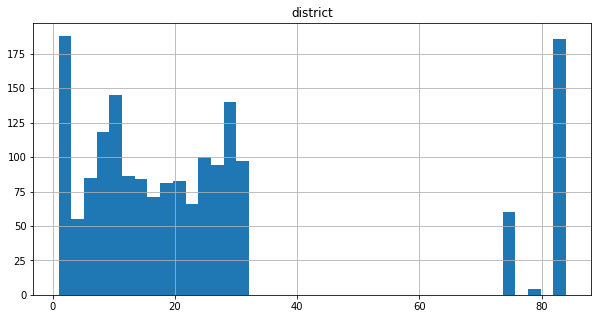

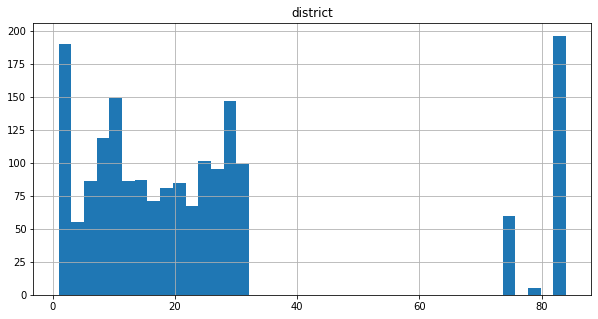

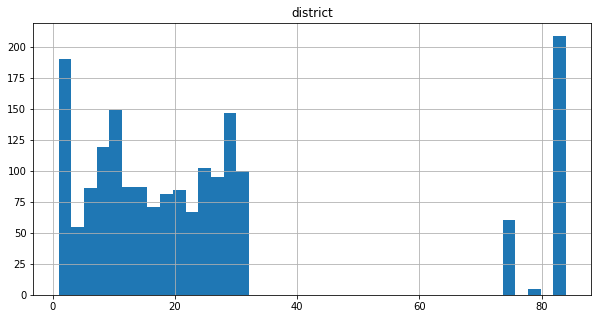

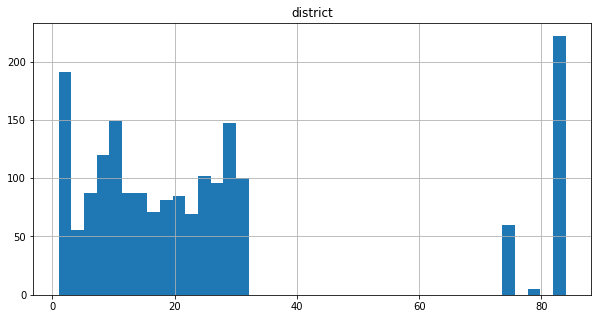

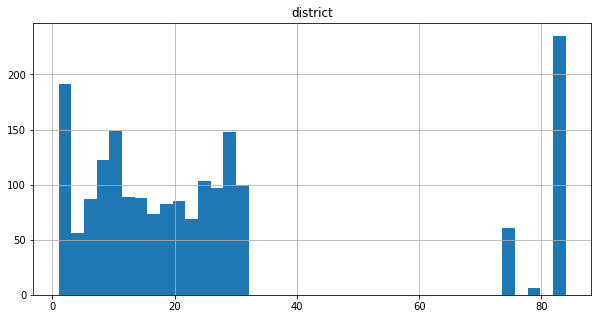

In [30]:
# histogram with the distribution of schools by district for different years (new)
df_groupby_year = df_0.groupby(["year"])
hist_schools_district = df_groupby_year.hist(column=["district"], figsize=(10,5), bins=40)
hist_schools_district

In [61]:
# table with the means data per district and only ethinic labels (previous)
means_district_ethnic_1 = means_district[["asian","black","white","hispanic","multiple_race_categories"]]
means_district_ethnic_1

asian       black       white    hispanic  \
district year                                                      
1        2014-15   87.642857   67.607143   72.500000  162.464286   
         2015-16   85.857143   66.178571   71.928571  163.571429   
         2016-17   87.535714   64.464286   72.250000  165.321429   
         2017-18   85.392857   61.071429   70.892857  166.607143   
         2018-19   83.892857   61.071429   72.392857  162.178571   
2        2014-15  123.316239   85.042735  125.735043  174.965812   
         2015-16  121.296610   82.720339  129.135593  173.228814   
         2016-17  119.813559   81.974576  133.355932  172.288136   
         2017-18  116.521008   77.521008  135.722689  170.109244   
         2018-19  114.831933   73.378151  138.327731  168.159664   
3        2014-15   41.069767  120.209302  157.976744  178.279070   
         2015-16   39.545455  114.272727  157.681818  169.090909   
         2016-17   40.431818  110.704545  159.318182  163.977273   
         2017-18   42.022727  104.681818  164.659091  161.000000   
         2018-19   43.431818  103.227273  165.931818  158.340909   
4        2014-15   32.500000  112.464286   18.714286  277.821429   
         2015-16   33.892857  109.142857   20.500000  275.928571   
         2016-17   36.142857  103.857143   21.821429  272.607143   
         2017-18   36.241379   98.482759   20.758621  254.517241   
         2018-19   38.103448  101.896552   20.689655  260.965517   
5        2014-15   15.259259  211.851852   18.037037  168.555556   
         2015-16   15.925926  203.333333   19.222222  167.740741   
         2016-17   16.185185  198.444444   19.111111  163.740741   
         2017-18   16.370370  191.703704   20.888889  158.185185   
         2018-19   14.259259  186.740741   23.259259  154.481481   
6        2014-15    6.217391   37.021739   19.978261  429.043478   
         2015-16    6.239130   35.760870   21.108696  420.326087   
         2016-17    6.760870   35.500000   22.586957  408.717391   
         2017-18    6.630435   32.869565   23.173913  396.500000   
         2018-19    7.000000   31.413043   24.456522  385.065217   
...                      ...         ...         ...         ...   
30       2014-15  189.212766   58.510638  130.744681  455.127660   
         2015-16  178.367347   56.061224  124.571429  432.122449   
         2016-17  177.489796   54.346939  128.551020  431.734694   
         2017-18  173.918367   53.040816  130.102041  427.857143   
         2018-19  167.920000   50.920000  127.560000  413.740000   
31       2014-15   71.385714  111.385714  427.085714  231.685714   
         2015-16   71.708333  109.055556  406.958333  230.972222   
         2016-17   75.835616  108.246575  394.027397  232.301370   
         2017-18   82.863014  105.630137  384.410959  234.123288   
         2018-19   91.356164  102.753425  370.630137  235.876712   
32       2014-15    9.407407   89.000000    8.370370  372.370370   
         2015-16    8.925926   80.222222    7.740741  351.740741   
         2016-17    8.222222   71.851852    8.703704  331.962963   
         2017-18    8.740741   68.481481    9.000000  312.185185   
         2018-19    8.481481   64.777778    9.037037  294.000000   
75       2014-15   26.583333  147.800000   50.566667  153.783333   
         2015-16   27.833333  148.150000   52.066667  157.450000   
         2016-17   29.866667  150.000000   52.833333  162.650000   
         2017-18   32.350000  149.083333   53.400000  164.200000   
         2018-19   35.803279  147.311475   52.475410  166.852459   
79       2014-15  104.000000  517.500000   89.750000  474.750000   
         2015-16  103.200000  425.400000   76.600000  454.800000   
         2016-17  124.000000  455.000000   80.000000  485.800000   
         2017-18  112.400000  392.600000   62.600000  429.800000   
         2018-19   88.500000  315.166667   54.833333  375.500000   
84       2014-15   10.053763  244.913978   17.220430  157.655914   
         20

In [37]:
# table with the means data per district and only ethinic labels (new)
means_district_ethnic_2 = means_district[["black","white","asian","hispanic","multiple_race_categories","non_white","black_hispanic","white_asian","non_white_asian"]]
means_district_ethnic_2

black       white       asian    hispanic  \
district year                                                      
1        2014-15   67.607143   72.500000   87.642857  162.464286   
         2015-16   66.178571   71.928571   85.857143  163.571429   
         2016-17   64.464286   72.250000   87.535714  165.321429   
         2017-18   61.071429   70.892857   85.392857  166.607143   
         2018-19   61.071429   72.392857   83.892857  162.178571   
2        2014-15   85.042735  125.735043  123.316239  174.965812   
         2015-16   82.720339  129.135593  121.296610  173.228814   
         2016-17   81.974576  133.355932  119.813559  172.288136   
         2017-18   77.521008  135.722689  116.521008  170.109244   
         2018-19   73.378151  138.327731  114.831933  168.159664   
3        2014-15  120.209302  157.976744   41.069767  178.279070   
         2015-16  114.272727  157.681818   39.545455  169.090909   
         2016-17  110.704545  159.318182   40.431818  163.977273   
         2017-18  104.681818  164.659091   42.022727  161.000000   
         2018-19  103.227273  165.931818   43.431818  158.340909   
4        2014-15  112.464286   18.714286   32.500000  277.821429   
         2015-16  109.142857   20.500000   33.892857  275.928571   
         2016-17  103.857143   21.821429   36.142857  272.607143   
         2017-18   98.482759   20.758621   36.241379  254.517241   
         2018-19  101.896552   20.689655   38.103448  260.965517   
5        2014-15  211.851852   18.037037   15.259259  168.555556   
         2015-16  203.333333   19.222222   15.925926  167.740741   
         2016-17  198.444444   19.111111   16.185185  163.740741   
         2017-18  191.703704   20.888889   16.370370  158.185185   
         2018-19  186.740741   23.259259   14.259259  154.481481   
6        2014-15   37.021739   19.978261    6.217391  429.043478   
         2015-16   35.760870   21.108696    6.239130  420.326087   
         2016-17   35.500000   22.586957    6.760870  408.717391   
         2017-18   32.869565   23.173913    6.630435  396.500000   
         2018-19   31.413043   24.456522    7.000000  385.065217   
...                      ...         ...         ...         ...   
30       2014-15   58.510638  130.744681  189.212766  455.127660   
         2015-16   56.061224  124.571429  178.367347  432.122449   
         2016-17   54.346939  128.551020  177.489796  431.734694   
         2017-18   53.040816  130.102041  173.918367  427.857143   
         2018-19   50.920000  127.560000  167.920000  413.740000   
31       2014-15  111.385714  427.085714   71.385714  231.685714   
         2015-16  109.055556  406.958333   71.708333  230.972222   
         2016-17  108.246575  394.027397   75.835616  232.301370   
         2017-18  105.630137  384.410959   82.863014  234.123288   
         2018-19  102.753425  370.630137   91.356164  235.876712   
32       2014-15   89.000000    8.370370    9.407407  372.370370   
         2015-16   80.222222    7.740741    8.925926  351.740741   
         2016-17   71.851852    8.703704    8.222222  331.962963   
         2017-18   68.481481    9.000000    8.740741  312.185185   
         2018-19   64.777778    9.037037    8.481481  294.000000   
75       2014-15  147.800000   50.566667   26.583333  153.783333   
         2015-16  148.150000   52.066667   27.833333  157.450000   
         2016-17  150.000000   52.833333   29.866667  162.650000   
         2017-18  149.083333   53.400000   32.350000  164.200000   
         2018-19  147.311475   52.475410   35.803279  166.852459   
79       2014-15  517.500000   89.750000  104.000000  474.750000   
         2015-16  425.400000   76.600000  103.200000  454.800000   
         2016-17  455.000000   80.000000  124.000000  485.800000   
         2017-18  392.600000   62.600000  112.400000  429.800000   
         2018-19  315.166667   54.833333   88.500000  375.500000   
84       2014-15  244.913978   17.220430   10.053763  157.655914   
         20

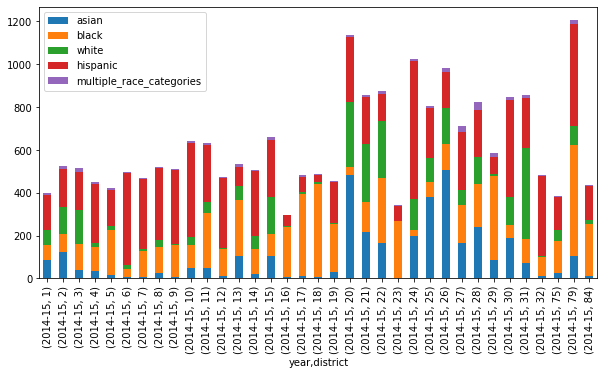

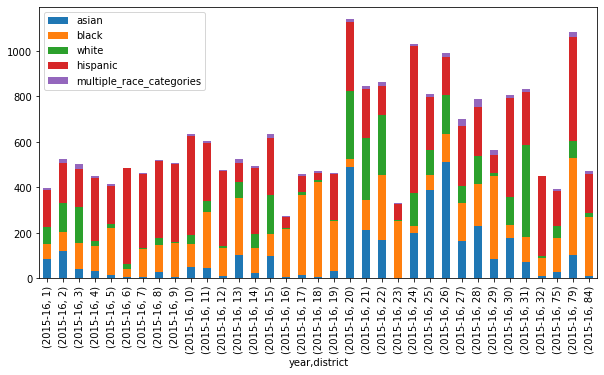

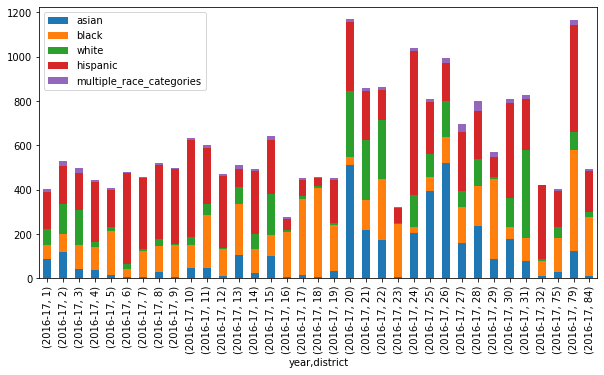

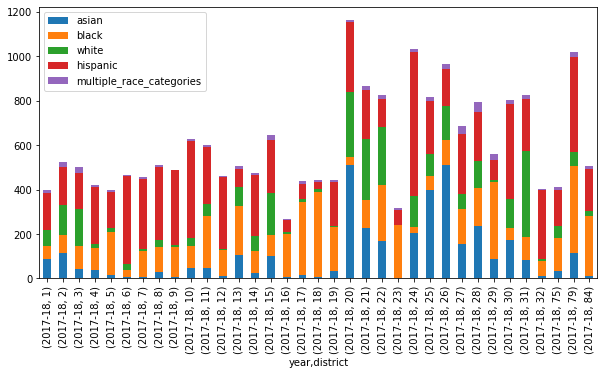

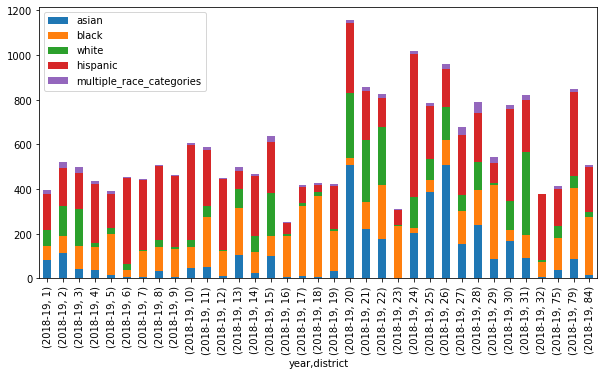

In [64]:
# plot with the mean distribution of ethnic per district
# the total heigh of the bar indicates the mean of the enrollment per district
#  it also gives an idea of the percentages but in a visual way
m_dist_1 = df_0.groupby(["year","district"]).agg('mean')
m_dist_1_ethnic_1 = m_dist_1[["asian","black","white","hispanic","multiple_race_categories"]]
m_dist_1_ethnic_1.filter(like='2014-15', axis=0).plot.bar(stacked=True, figsize=(10,5))
m_dist_1_ethnic_1.filter(like='2015-16', axis=0).plot.bar(stacked=True, figsize=(10,5))
m_dist_1_ethnic_1.filter(like='2016-17', axis=0).plot.bar(stacked=True, figsize=(10,5))
m_dist_1_ethnic_1.filter(like='2017-18', axis=0).plot.bar(stacked=True, figsize=(10,5))
m_dist_1_ethnic_1.filter(like='2018-19', axis=0).plot.bar(stacked=True, figsize=(10,5))

In [74]:
# seeking correlation among the means of the ethnic characteristic per district
#  Commnet: asian population and white population seems to be mildly correlated.
Pearson_1415 = means_district_ethnic_2.filter(like='2014-15', axis=0).corr(method='pearson')
Pearson_1516 = means_district_ethnic_2.filter(like='2015-16', axis=0).corr(method='pearson')
Pearson_1617 = means_district_ethnic_2.filter(like='2016-17', axis=0).corr(method='pearson')
Pearson_1718 = means_district_ethnic_2.filter(like='2017-18', axis=0).corr(method='pearson')
Pearson_1819 = means_district_ethnic_2.filter(like='2018-19', axis=0).corr(method='pearson')

In [76]:
Pearson_1415 

,black,white,asian,hispanic,multiple_race_categories,non_white,black_hispanic,white_asian,non_white_asian
black,1.000000,-0.265349,-0.267306,-0.446657,0.197605,0.130805,0.417321,-0.299000,0.424915
white,-0.265349,1.000000,0.581843,0.075263,0.330402,0.323439,-0.154673,0.858563,-0.135211
asian,-0.267306,0.581843,1.000000,0.090900,0.394903,0.644296,-0.140493,0.916535,-0.117585
hispanic,-0.446657,0.075263,0.090900,1.000000,-0.054716,0.543256,0.626673,0.094316,0.618681
multiple_race_categories,0.197605,0.330402,0.394903,-0.054716,1.000000,0.421731,0.116538,0.411429,0.170800
non_white,0.130805,0.323439,0.644296,0.543256,0.421731,1.000000,0.665720,0.565223,0.683712
black_hispanic,0.417321,-0.154673,-0.140493,0.626673,0.116538,0.665720,1.000000,-0.164630,0.998497
white_asian,-0.299000,0.858563,0.916535,0.094316,0.411429,0.565223,-0.164630,1.000000,-0.140618
non_white_asian,0.424915,-0.135211,-0.117585,0.618681,0.170800,0.683712,0.998497,-0.140618,1.000000


In [77]:
Pearson_1516

,black,white,asian,hispanic,multiple_race_categories,non_white,black_hispanic,white_asian,non_white_asian
black,1.000000,-0.292361,-0.285887,-0.504530,0.145743,0.013942,0.316885,-0.323497,0.325096
white,-0.292361,1.000000,0.584163,0.063293,0.375546,0.338114,-0.185154,0.854663,-0.160374
asian,-0.285887,0.584163,1.000000,0.094069,0.399563,0.691573,-0.145706,0.920651,-0.119526
hispanic,-0.504530,0.063293,0.094069,1.000000,-0.093534,0.546584,0.659020,0.090616,0.650632
multiple_race_categories,0.145743,0.375546,0.399563,-0.093534,1.000000,0.375332,0.024211,0.436224,0.088326
non_white,0.013942,0.338114,0.691573,0.546584,0.375332,1.000000,0.612585,0.605011,0.634467
black_hispanic,0.316885,-0.185154,-0.145706,0.659020,0.024211,0.612585,1.000000,-0.182262,0.997938
white_asian,-0.323497,0.854663,0.920651,0.090616,0.436224,0.605011,-0.182262,1.000000,-0.153596
non_white_asian,0.325096,-0.160374,-0.119526,0.650632,0.088326,0.634467,0.997938,-0.153596,1.000000


In [78]:
Pearson_1617

,black,white,asian,hispanic,multiple_race_categories,non_white,black_hispanic,white_asian,non_white_asian
black,1.000000,-0.276124,-0.266655,-0.440893,0.090160,0.066624,0.362275,-0.302912,0.367771
white,-0.276124,1.000000,0.586373,0.072682,0.402423,0.348084,-0.150978,0.851350,-0.123749
asian,-0.266655,0.586373,1.000000,0.112835,0.433264,0.693806,-0.101516,0.924155,-0.072293
hispanic,-0.440893,0.072682,0.112835,1.000000,-0.081651,0.568206,0.676865,0.107351,0.670354
multiple_race_categories,0.090160,0.402423,0.433264,-0.081651,1.000000,0.363840,-0.010848,0.470374,0.056260
non_white,0.066624,0.348084,0.693806,0.568206,0.363840,1.000000,0.644693,0.613480,0.668121
black_hispanic,0.362275,-0.150978,-0.101516,0.676865,-0.010848,0.644693,1.000000,-0.136945,0.997747
white_asian,-0.302912,0.851350,0.924155,0.107351,0.470374,0.613480,-0.136945,1.000000,-0.105178
non_white_asian,0.367771,-0.123749,-0.072293,0.670354,0.056260,0.668121,0.997747,-0.105178,1.000000


In [79]:
Pearson_1718

,black,white,asian,hispanic,multiple_race_categories,non_white,black_hispanic,white_asian,non_white_asian
black,1.000000,-0.306460,-0.291483,-0.506995,0.059237,-0.034655,0.278309,-0.333593,0.283021
white,-0.306460,1.000000,0.582154,0.073300,0.399854,0.356913,-0.176747,0.848095,-0.144682
asian,-0.291483,0.582154,1.000000,0.123198,0.408267,0.731259,-0.108515,0.924527,-0.075785
hispanic,-0.506995,0.073300,0.123198,1.000000,-0.079379,0.561878,0.686793,0.114640,0.680346
multiple_race_categories,0.059237,0.399854,0.408267,-0.079379,1.000000,0.348198,-0.038502,0.453472,0.041638
non_white,-0.034655,0.356913,0.731259,0.561878,0.348198,1.000000,0.596892,0.643823,0.624720
black_hispanic,0.278309,-0.176747,-0.108515,0.686793,-0.038502,0.596892,1.000000,-0.153562,0.996789
white_asian,-0.333593,0.848095,0.924527,0.114640,0.453472,0.643823,-0.153562,1.000000,-0.117203
non_white_asian,0.283021,-0.144682,-0.075785,0.680346,0.041638,0.624720,0.996789,-0.117203,1.000000


In [80]:
Pearson_1819

,black,white,asian,hispanic,multiple_race_categories,non_white,black_hispanic,white_asian,non_white_asian
black,1.000000,-0.313429,-0.313893,-0.586024,-0.005040,-0.151914,0.166143,-0.350935,0.166817
white,-0.313429,1.000000,0.586666,0.077481,0.449286,0.393139,-0.181311,0.849052,-0.140201
asian,-0.313893,0.586666,1.000000,0.129501,0.441580,0.772848,-0.118413,0.925950,-0.077594
hispanic,-0.586024,0.077481,0.129501,1.000000,-0.094926,0.550492,0.701668,0.120614,0.697572
multiple_race_categories,-0.005040,0.449286,0.441580,-0.094926,1.000000,0.346223,-0.119954,0.497589,-0.026490
non_white,-0.151914,0.393139,0.772848,0.550492,0.346223,1.000000,0.536352,0.687516,0.572710
black_hispanic,0.166143,-0.181311,-0.118413,0.701668,-0.119954,0.536352,1.000000,-0.161800,0.995609
white_asian,-0.350935,0.849052,0.925950,0.120614,0.497589,0.687516,-0.161800,1.000000,-0.116000
non_white_asian,0.166817,-0.140201,-0.077594,0.697572,-0.026490,0.572710,0.995609,-0.116000,1.000000
